<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [0]:
X_train.shape

(2563, 224, 224, 3)

In [0]:
y_train.shape

(2563,)

In [0]:
X_test.shape

(1099, 224, 224, 3)

In [0]:
y_test.shape

(1099,)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [0]:
y_test[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [0]:
batch_size = 128
epochs = 25
num_classes = 5

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(224,224,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
#model.add(Dense(128, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))                  
#model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(num_classes, activation='sigmoid'))



In [0]:
#compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
X_train.shape

(2563, 224, 224, 3)

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 128)      

In [0]:
#train the model
X_train_norm = X_train/255
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 

Train on 2306 samples, validate on 257 samples
Epoch 1/25
2306/2306 [==============================] - 10s 4ms/step - loss: 1.1250 - acc: 0.5620 - val_loss: 0.8670 - val_acc: 0.6809
Epoch 2/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.8298 - acc: 0.7056 - val_loss: 0.7950 - val_acc: 0.6848
Epoch 3/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.7892 - acc: 0.7155 - val_loss: 0.7646 - val_acc: 0.7004
Epoch 4/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.7700 - acc: 0.7164 - val_loss: 0.7847 - val_acc: 0.7510
Epoch 5/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.7501 - acc: 0.7229 - val_loss: 0.7721 - val_acc: 0.7393
Epoch 6/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.7264 - acc: 0.7255 - val_loss: 0.7155 - val_acc: 0.7432
Epoch 7/25
2306/2306 [==============================] - 9s 4ms/step - loss: 0.7184 - acc: 0.7316 - val_loss: 0.7289 - val_acc: 0.7082
Epoch 8/25
230

In [0]:
#evaluate model
X_test_norm = X_test/255
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 1.3334482262848288
Test accuracy: 0.7197452228214656


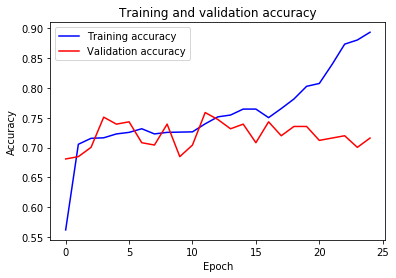

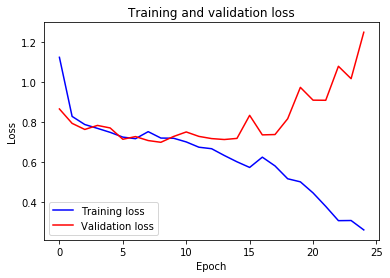

In [0]:
accuracy = eyetest_train.history['acc']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_acc']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
y_pred[1000]

array([1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 8.7442994e-04,
       1.0000000e+00], dtype=float32)

In [0]:
y_test[4]

array([1., 0., 0., 0., 0.], dtype=float32)

In [0]:
def decode(datum):
    return np.argmax(datum)

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))
    

In [0]:
len(y_pred_decoded)

1099

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [0]:
len(y_test_decoded)

1099

In [0]:
compare = np.column_stack((y_test_decoded, y_pred_decoded))

In [0]:
compare[0:100]

array([[0, 0],
       [1, 0],
       [3, 0],
       [4, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [4, 2],
       [2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 2],
       [2, 0],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [4, 0],
       [1, 3],
       [1, 1],
       [2, 0],
       [2, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [2, 2],
       [2, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [4, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [4, 1],
       [4, 2],
       [0, 0],
       [1, 0],
       [2, 1],
       [4, 2],
       [0, 0],
       [3, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [3, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 1],
       [4, 2],
       [3, 3],
       [2, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [0,

In [0]:
from sklearn.metrics import classification_report
#multilabel_confusion_matrix(y_test_decoded, y_pred_decoded)
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.82      0.97      0.89       540
            Mild       0.34      0.50      0.40        98
        Moderate       0.64      0.58      0.61       302
          Severe       0.21      0.11      0.14        55
Proliferative DR       0.43      0.06      0.10       104

        accuracy                           0.69      1099
       macro avg       0.49      0.44      0.43      1099
    weighted avg       0.66      0.69      0.66      1099

